In [10]:
#多项式回归 ——二项式回归
import numpy as np
import matplotlib.pyplot as plt

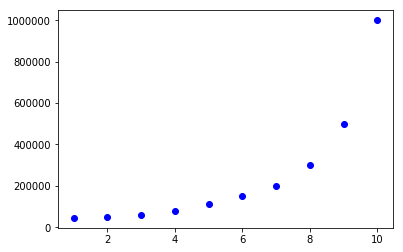

[[  1.   1.]
 [  2.   4.]
 [  3.   9.]
 [  4.  16.]
 [  5.  25.]
 [  6.  36.]
 [  7.  49.]
 [  8.  64.]
 [  9.  81.]
 [ 10. 100.]]
[  45000.   50000.   60000.   80000.  110000.  150000.  200000.  300000.
  500000. 1000000.]


In [11]:
#载入数据
data = np.genfromtxt("job.csv",delimiter=",")
x_data = data[1:,1]
y_data = data[1:,2]
plt.scatter(x_data,y_data,c = 'b')
plt.show()
x_data = np.c_[x_data,x_data**2]
print(x_data)
print(y_data)

In [12]:
def costfunction(x_data,y_data,theta0,theta1,theta2):
    m = len(x_data)
    sumError = 0
    a = 1 / (float(m) * 2)
    for i in range(m):
        sumError += ((theta0 + theta1 * x_data[i,0] + theta1 * x_data[i,1]) - y_data[i]) ** 2
    return sumError * a 
def gradientDecent(x_data,y_data,theta0,theta1,theta2,lr,repeat):
    m = len(x_data)
    for j in range(repeat):
        theta0_temp = 0
        theta1_temp = 0
        theta2_temp = 0
        for i in range(m):
            theta0_temp += ((theta0 + theta1 * x_data[i,0] + theta2 * x_data[i,1]) - y_data[i])
            theta1_temp += ((theta0 + theta1 * x_data[i,0] + theta2 * x_data[i,1]) - y_data[i]) * x_data[i,0]
            theta2_temp += ((theta0 + theta1 * x_data[i,0] + theta2 * x_data[i,1]) - y_data[i]) * x_data[i,1]
        #更新theta 
        theta0 = theta0 - lr * (1 / float(m)) * theta0_temp
        theta1 = theta1 - lr * (1 / float(m)) * theta1_temp
        theta2 = theta2 - lr * (1 / float(m)) * theta2_temp
    return theta0,theta1,theta2

In [13]:
theta0 = 0
theta1 = 0 
theta2 = 0
lr = 0.0001
repeat = 100

print(costfunction(x_data,y_data,theta0,theta1,theta2))
theta0,theta1,theta2 = gradientDecent(x_data,y_data,theta0,theta1,theta2,lr,repeat)
print(costfunction(x_data,y_data,theta0,theta1,theta2))

71456250000.0
75995067629.92342


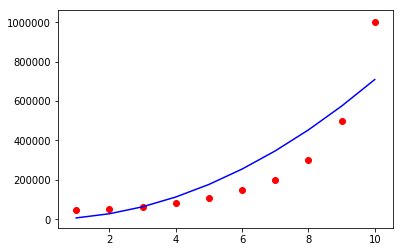

In [14]:
plt.plot(x_data[:,0],theta0 + theta1 * x_data[:,0] + theta2 * x_data[:,1],c = 'b')
plt.scatter(x_data[:,0],y_data,c = 'r')
plt.show()